<a href="https://colab.research.google.com/github/piyushmishra12/Random-Motion-Tracking/blob/main/kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulating Brownian Motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Brownian():
  def __init__(self, steps):
    self.steps = steps

  def generate_random_walk(self):
    walk = np.zeros(self.steps)
    for i in range(1, self.steps):
      # draw from normal distribution
      yi = np.random.choice([-1,1])
      walk[i] = walk[i-1] + yi/np.sqrt(self.steps)
    return walk

In [3]:
b = Brownian(1000)
measurements = b.generate_random_walk()

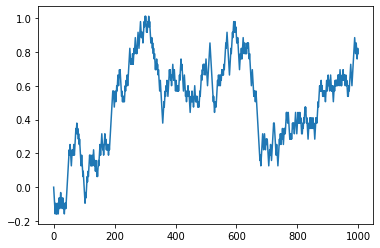

In [4]:
plt.plot(measurements)

# Tracking this motion

In [5]:
class Kalman():
  def __init__(self, F, H, Q, R, P = None, x0 = None):
    self.n = F.shape[1]
    self.F = F
    self.H = H
    self.Q = Q
    self.R = R
    self.P = np.eye(self.n) if P is None else P
    self.x = np.zeros((self.n, 1)) if x0 is None else x0
  
  def predict(self):
    self.x = np.dot(self.F, self.x)
    self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
    return self.x
  
  def update(self, z):
    # prerequisites for the update step
    y = z - np.dot(self.H, self.x)
    S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
    K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
    I = np.eye(self.n)

    # the update step
    self.x = self.x + np.dot(K, y)
    self.P = np.dot(I - np.dot(K, self.H), self.P)

In [6]:
F = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
H = np.array([1, 0, 0, 0]).reshape(1, 4)
Q = np.eye(4)*0.05
R = np.array([0.5]).reshape(1,1)

filter = Kalman(F = F, H = H, Q = Q, R = R)
preds = []

for z in measurements:
  preds.append(np.dot(H,  filter.predict())[0])
  filter.update(z)

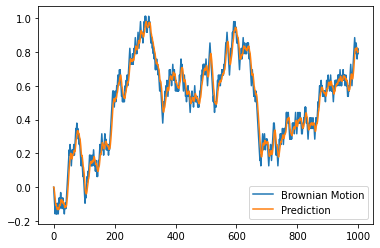

In [7]:
plt.plot(measurements)
plt.plot(preds)
plt.legend(['Brownian Motion', 'Prediction'])

# Trying Multiple Particle Filter

In [8]:
b = Brownian(1000)
walks = []
for i in range(10):
  walks.append(b.generate_random_walk())

In [9]:
filter = Kalman(F = F, H = H, Q = Q, R = R)
predictions = []
for i in range(len(walks)):
  preds = []

  for z in walks[i]:
    preds.append(np.dot(H, filter.predict())[0])
    filter.update(z)
  
  predictions.append(preds)

Text(0.5, 1.0, 'Predicted Motion')

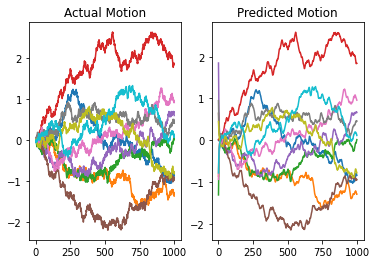

In [11]:
plt.subplot(1,2,1)
for walk in walks:
  plt.plot(walk)
plt.title("Actual Motion")
plt.subplot(1,2,2)
for pred in predictions:
  plt.plot(pred)
plt.title("Predicted Motion")